<a href="https://colab.research.google.com/github/hyunsoojin/colab/blob/main/8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [24]:
model.layers

In [25]:
conv = model.layers[0]

In [26]:
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [27]:
conv_weights = conv.weights[0].numpy()

In [28]:
print(conv_weights.mean(), conv_weights.std())

-0.017074108 0.17008586


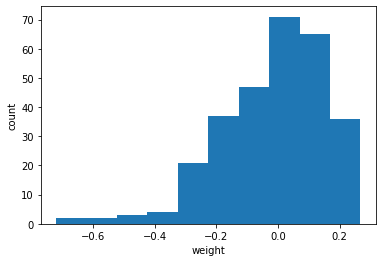

In [29]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

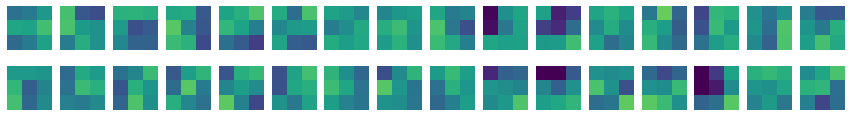

In [30]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [31]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding = 'same', input_shape=(28,28,1)))

In [32]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [33]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0009659086 0.078047924


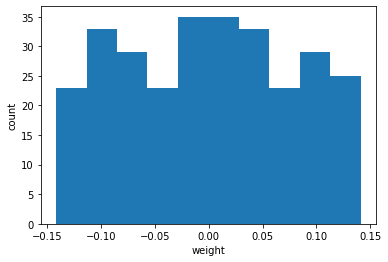

In [34]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

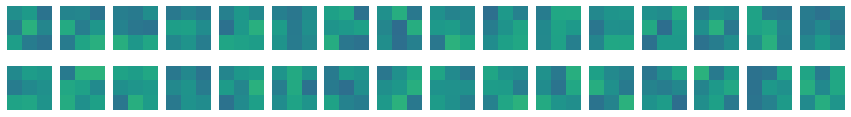

In [35]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [36]:
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [37]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [38]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [39]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


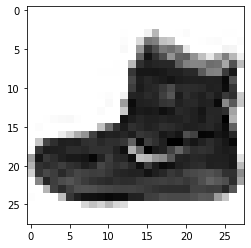

In [40]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [42]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [43]:
print(feature_maps.shape)

(1, 28, 28, 32)


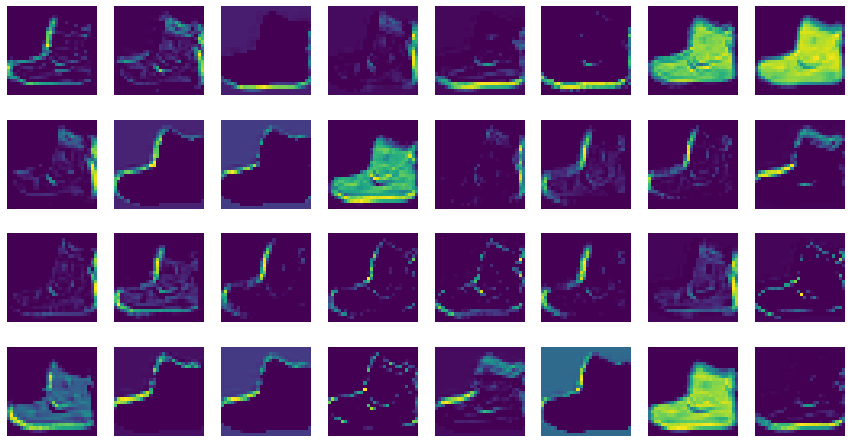

In [44]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()

In [45]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [46]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [47]:
print(feature_maps.shape)

(1, 14, 14, 64)


In [48]:
conv2_acti.layers

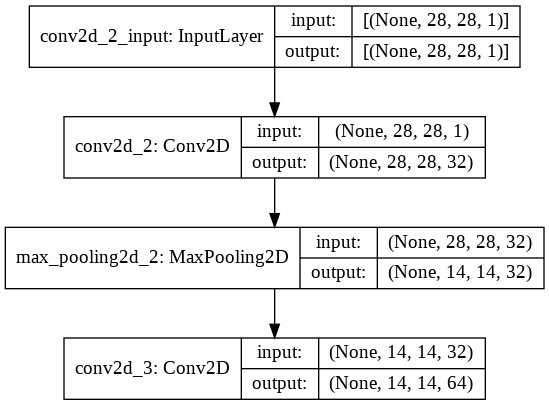

In [49]:
keras.utils.plot_model(conv2_acti, show_shapes=True)

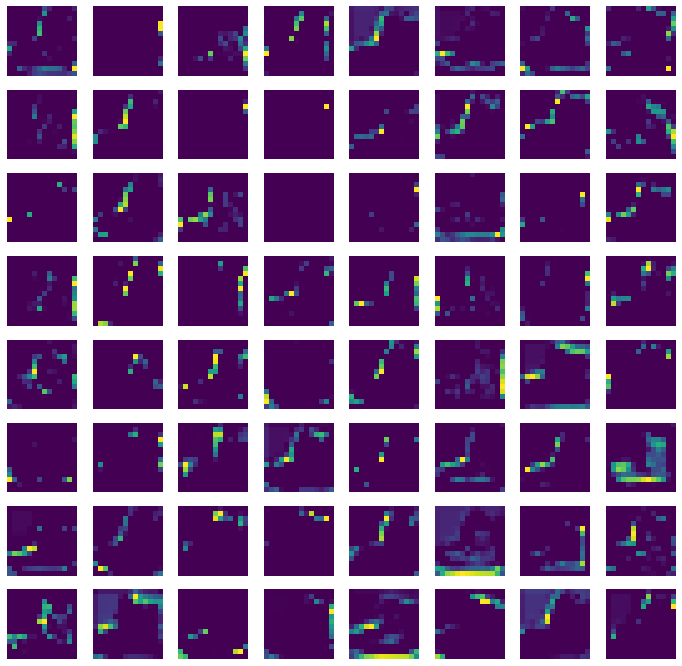

In [50]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()